In [1]:
# imports
from astropy.io import fits
from scipy import interpolate as sin
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 
import match
import SED

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Read Data

In [3]:
# read AGN IDs
agnIDs = myP.ReadFile(path_csv+'\ID_RedYelBlu_AGNselection.csv')

# convert agnIDs into list of integer numpy arrays 
agnIDs_npArray = []
for row in agnIDs : 
    agnIDs_npArray.append(np.array(row, dtype=int))

Cropped:  ['Row 1 = red IR selected AGN. Row 2 = yellow both IR-Xray AGN. Row 3 = blue X-ray selected AGN. Row 4 = blue X-ray selected AGN with IRAC detections. Row 5 = blue X-ray selected AGN without IRAC detections. Row 6 = red IR selected AGN with 24um detection. Row 7 = yellow both IR-Xray AGN with 24um detection. Row 8 = blue X-ray selected AGN with 24um and IRAC detections. Values are ID_COSMOS2015.']


In [4]:
# constants for AGN type index

RED = 0     # red       IR selected AGN
YEL = 1     # yellow    both IR-Xray AGN
BLU = 2     # blue      X-ray selected AGN

BYI = 3     # blue      X-ray selected AGN  with IRAC detections
BNI = 4     # blue      X-ray selected AGN  without IRAC detections

R24 = 5     # red       IR selected AGN     with 24um detection
Y24 = 6     # yellow    both IR-Xray AGN    with 24um detection
B24 = 7     # blue      X-ray selected AGN  with 24um and IRAC detections

In [5]:
def PrintNumber(myList) : 
    # make list of AGN names for printting info 
    agnTypeNames = ['Red:\t', 'Yel:\t', 'Blu:\t', 'Byi:\t', 'Bni:\t', 'r24:\t', 'y24:\t', 'r24:\t']
    # print name and number of items in list 
    for name, row in zip(agnTypeNames, myList) : 
        print(name, row.shape)

In [6]:
# print number of sources in agnIDs_npArray
PrintNumber(agnIDs_npArray)

Red:	 (547,)
Yel:	 (609,)
Blu:	 (1567,)
Byi:	 (1416,)
Bni:	 (151,)
r24:	 (399,)
y24:	 (501,)
r24:	 (1016,)


In [7]:
# read redshifts
zAll = np.array(myP.ReadFile(path_cat+'\COSMOS_z_matches.csv'))
zID, zZ = zAll.T
# get correct data type
zID = np.array(zID, dtype=int)
zZ  = np.array(zZ,  dtype=float)
# apply mask to remove bad redshifts
mask_z = (zZ >= 0) & (zZ < 99)
zID = zID[mask_z]
zZ  = zZ[mask_z]
# print info
print('Number of sources w/ z:', len(zID))

Cropped:  ['ID', 'z']
Number of sources w/ z: 485793


In [8]:
agn_z = []
agn_ID_wZ = []

for row in agnIDs_npArray : 
    # match redshift against AGN IDs
    key_z_agn, key_agn_z = match.match(zID, row)
    # get redshift array for AGN
    agn_z.append(zZ[key_z_agn])
    # get AGN ID arrays w/ redshifts
    agn_ID_wZ.append(row[key_agn_z])

# PrintNumber(agn_z)

In [9]:
# open COSMOS 2020 catalog file and get data 
inf20 = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data20 = inf20[1].data
inf20.close()

In [10]:
Fnu_uJy = SED.GetPhotometry(data20)
IDs_all = SED.GetID(data20)
lam_A   = SED.GetObservedWavelengths_A()

Array shape:	 (1720700, 20)
Array shape:	 (1720700,)
Array shape:	 (20,)


In [11]:
agn_Fnu_uJy = []
agn_ID_wZ_wPhot = []

for row in agn_ID_wZ : 
    # match photometry IDs against AGN IDs 
    key_IDall_agn, key_agn_IDall = match.match(IDs_all, row)
    # get photometry for AGN
    agn_Fnu_uJy.append(Fnu_uJy[key_IDall_agn])
    # get AGN arrays with photometry 
    agn_ID_wZ_wPhot.append(row[key_agn_IDall])

# PrintNumber(agn_Fnu_uJy)

# Preapare SED

In [12]:
agn_lamR_A = []

# convert each AGN type to rest wavelength
for row in agn_z : 
    agn_lamR_A.append(SED.ConvertToRestWavelength(row))

Array shape:	 (547, 20)
Array shape:	 (609, 20)
Array shape:	 (1567, 20)
Array shape:	 (1416, 20)
Array shape:	 (151, 20)
Array shape:	 (399, 20)
Array shape:	 (501, 20)
Array shape:	 (1016, 20)


In [13]:
agn_lamFlam_ergscm2 = []

# convert each AGN type to energy density
for lamR,Fnu in zip(agn_lamR_A, agn_Fnu_uJy) : 
    agn_lamFlam_ergscm2.append(SED.ConvertToEnergyDensity(lamR,Fnu))

Array shape:	 (547, 20)
Array shape:	 (609, 20)
Array shape:	 (1567, 20)
Array shape:	 (1416, 20)
Array shape:	 (151, 20)
Array shape:	 (399, 20)
Array shape:	 (501, 20)
Array shape:	 (1016, 20)


In [14]:
agn_lamFlam_ergscm2_norm = []

# normalize each AGN type at 1um
for lamR,lamFlam in zip(agn_lamR_A, agn_lamFlam_ergscm2) : 
    agn_lamFlam_ergscm2_norm.append(SED.NormalizeSED_1um(lamR,lamFlam))

Array shape:	 (547, 20)
Array shape:	 (609, 20)
Array shape:	 (1567, 20)
Array shape:	 (1416, 20)
Array shape:	 (151, 20)
Array shape:	 (399, 20)
Array shape:	 (501, 20)
Array shape:	 (1016, 20)


# Plot

In [15]:
# set standard plot format
myP.SetStyle()

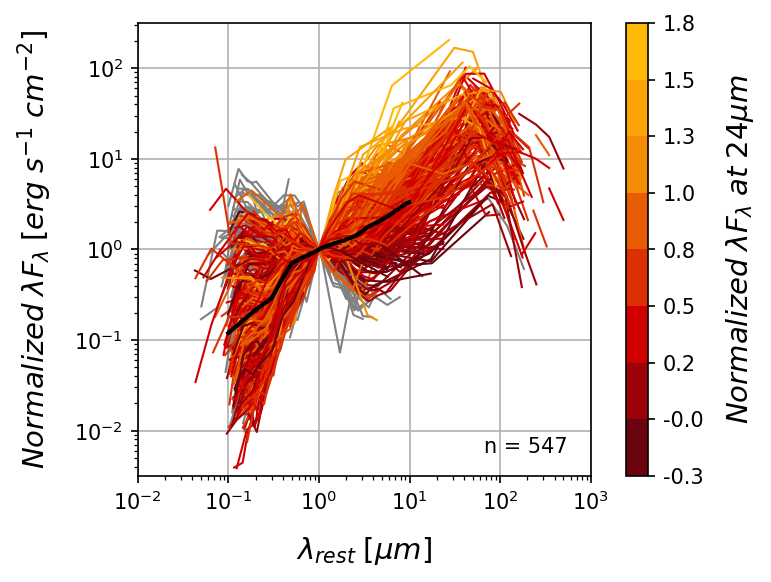

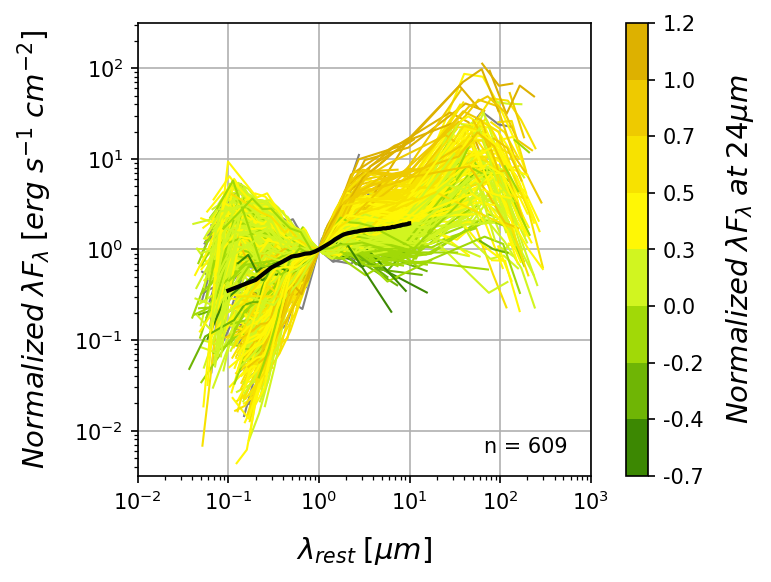

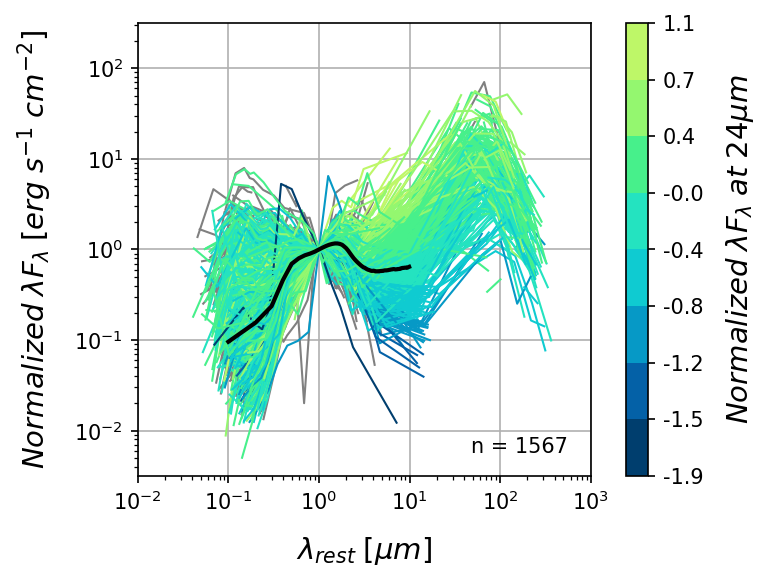

In [16]:
# plot SEDs for all color AGN 
SED.PlotSED(agn_lamR_A[RED], agn_lamFlam_ergscm2_norm[RED], cmap='r', save=path_fig+'\COSMOS_SED_red.png')#, title='Red: Donley selected sources')
SED.PlotSED(agn_lamR_A[YEL], agn_lamFlam_ergscm2_norm[YEL], cmap='y', save=path_fig+'\COSMOS_SED_yel.png')#, title='Yellow: Both X-ray and Donley')
SED.PlotSED(agn_lamR_A[BLU], agn_lamFlam_ergscm2_norm[BLU], cmap='b', save=path_fig+'\COSMOS_SED_blu.png')#, title='Blue: X-ray luminous AGN')

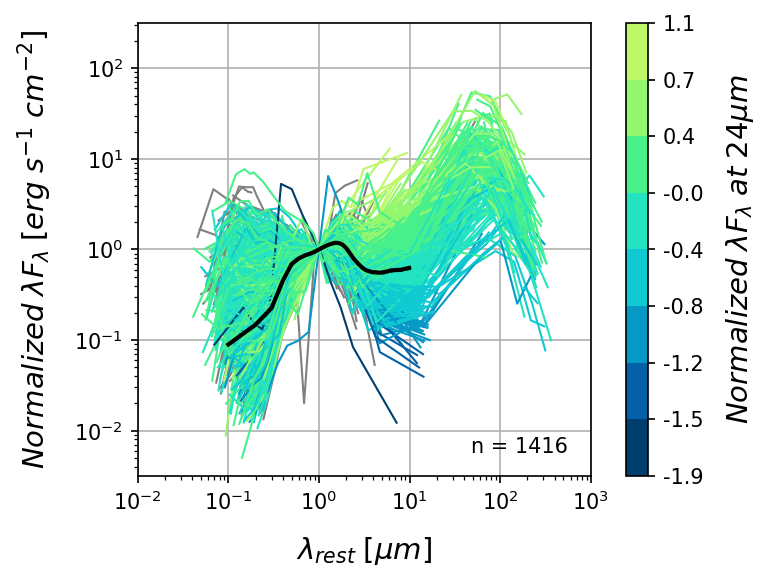

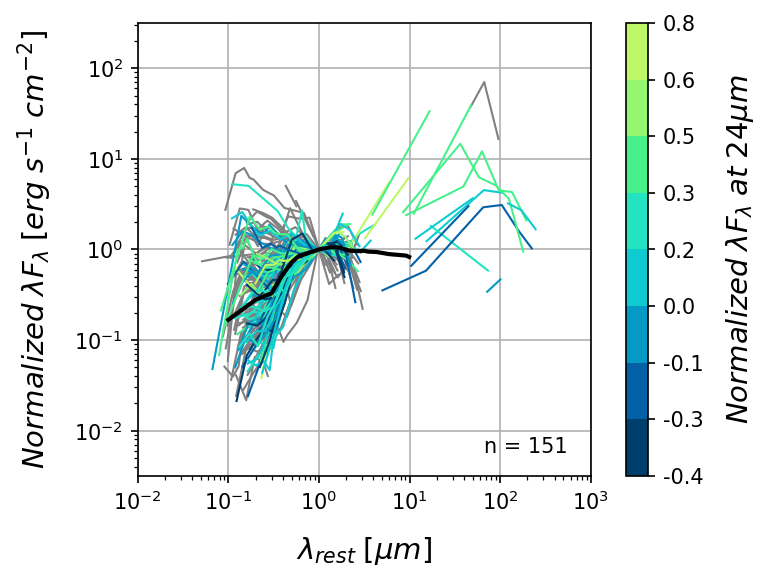

In [17]:
# plot SEDs for split blue 
SED.PlotSED(agn_lamR_A[BYI], agn_lamFlam_ergscm2_norm[BYI], cmap='b', save=path_fig+'\COSMOS_SED_byi.png')#, title='Blue w/ IRAC: X-ray luminous AGN')
SED.PlotSED(agn_lamR_A[BNI], agn_lamFlam_ergscm2_norm[BNI], cmap='b', save=path_fig+'\COSMOS_SED_bni.png')#, title='Blue w/o IRAC: X-ray luminous AGN')

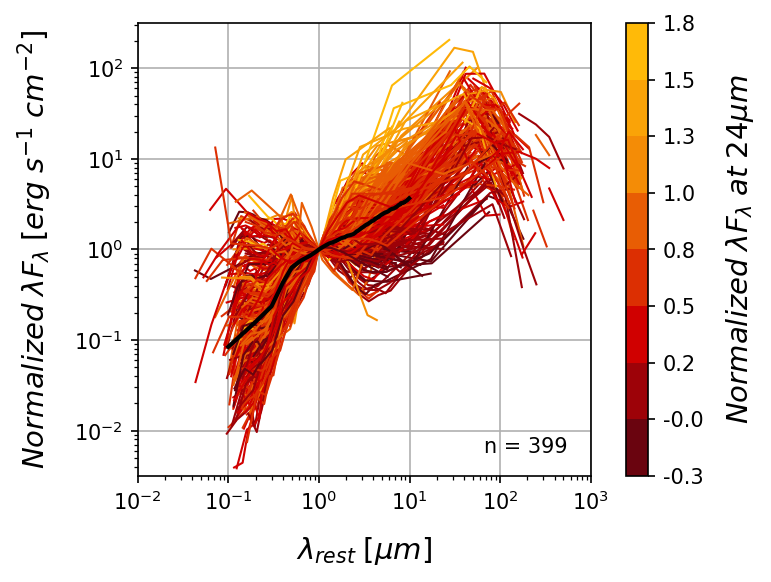

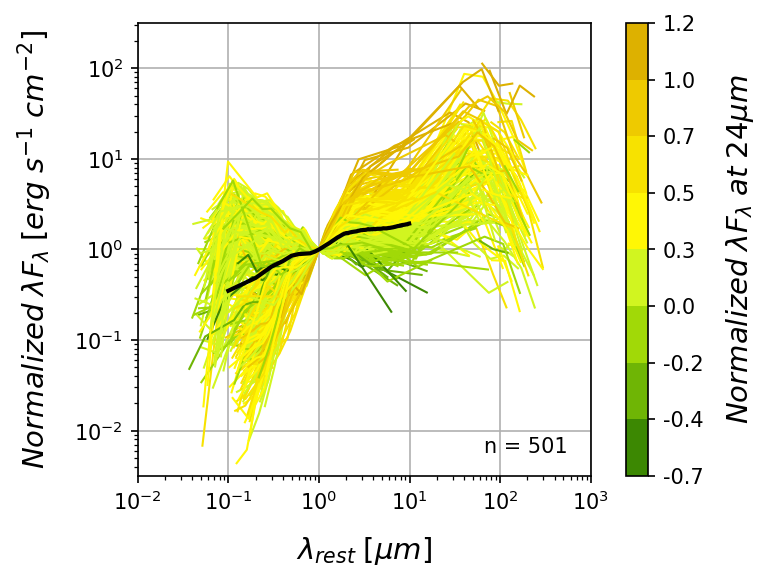

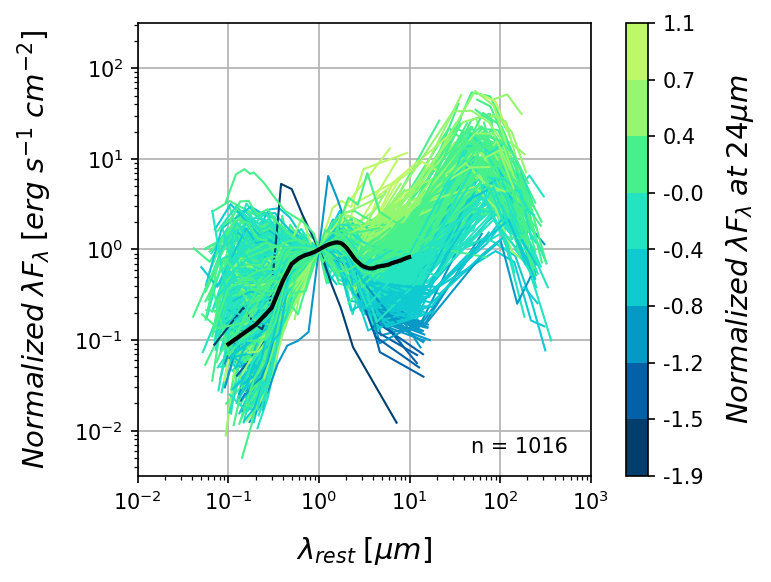

In [18]:
# plot SEDs for all color AGN with 24um detections 
SED.PlotSED(agn_lamR_A[R24], agn_lamFlam_ergscm2_norm[R24], cmap='r', save=path_fig+'\COSMOS_SED_r24.png')#, title='Red w/24um: Donley selected sources')
SED.PlotSED(agn_lamR_A[Y24], agn_lamFlam_ergscm2_norm[Y24], cmap='y', save=path_fig+'\COSMOS_SED_y24.png')#, title='Yellow w/24um: Both X-ray and Donley')
SED.PlotSED(agn_lamR_A[B24], agn_lamFlam_ergscm2_norm[B24], cmap='b', save=path_fig+'\COSMOS_SED_b24.png')#, title='Blue w/24um: X-ray luminous AGN')

Array shape:	 (2723, 20)
Array shape:	 (2723, 20)


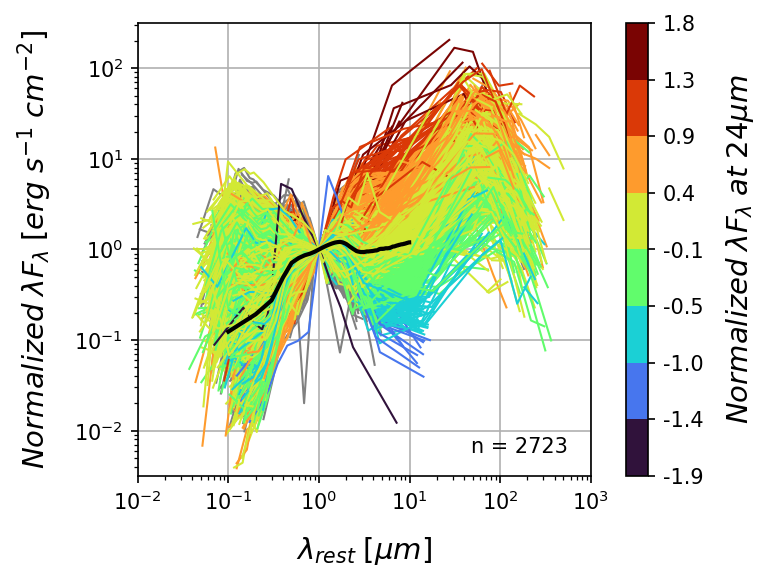

In [19]:
# get array for all sources
all_lamR_A = np.concatenate((agn_lamR_A[RED],agn_lamR_A[YEL],agn_lamR_A[BLU]), axis=0)
all_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm[RED],agn_lamFlam_ergscm2_norm[YEL],agn_lamFlam_ergscm2_norm[BLU]), axis=0)

# verify
SED.PrintShape(all_lamR_A)
SED.PrintShape(all_lamFlam_ergscm2_norm)

# plot SED for all sources
SED.PlotSED(all_lamR_A, all_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all.png')#, title='All sources')

Array shape:	 (1916, 20)
Array shape:	 (1916, 20)


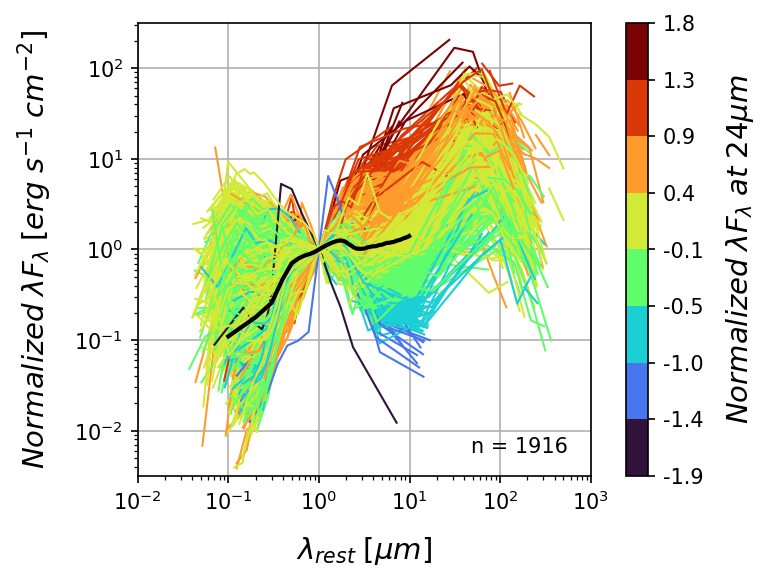

In [20]:
# get array for all sources
all24_lamR_A = np.concatenate((agn_lamR_A[R24],agn_lamR_A[Y24],agn_lamR_A[B24]), axis=0)
all24_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm[R24],agn_lamFlam_ergscm2_norm[Y24],agn_lamFlam_ergscm2_norm[B24]), axis=0)

# verify
SED.PrintShape(all24_lamR_A)
SED.PrintShape(all24_lamFlam_ergscm2_norm)

# plot SED for all sources
SED.PlotSED(all24_lamR_A, all24_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all24.png')#, title='All sources w/24um')

# Bin by Redshift

In [21]:
agn_lamR_A_z01 = []
agn_lamFlam_ergscm2_norm_z01 = []

for z,lamR,lamFlam in zip(agn_z, agn_lamR_A,agn_lamFlam_ergscm2_norm) : 
    # get mask for redshifts between 0<z<1
    mask = (z > 0) & (z <= 1)
    # get rest wavelengths for sources
    agn_lamR_A_z01.append(lamR[mask])
    # get energy density for sources
    agn_lamFlam_ergscm2_norm_z01.append(lamFlam[mask])


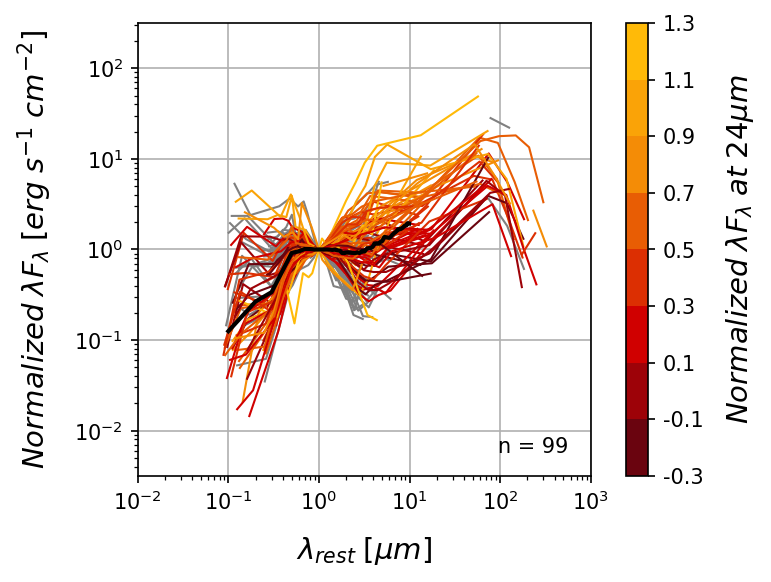

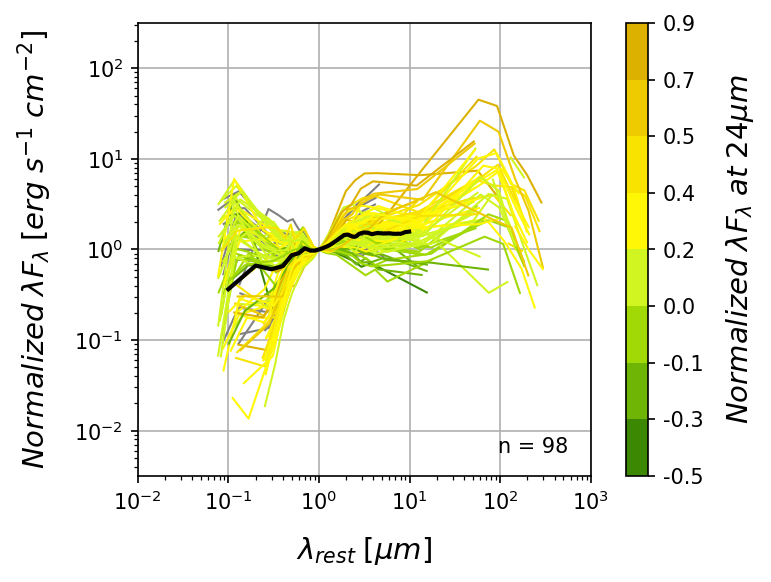

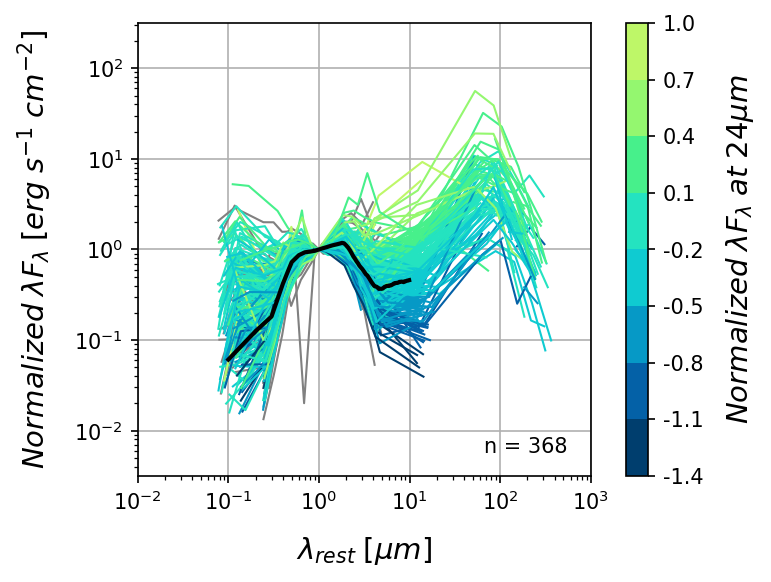

In [22]:
# plot SEDs for 0<z<1 for all color AGN 
SED.PlotSED(agn_lamR_A_z01[RED], agn_lamFlam_ergscm2_norm_z01[RED], cmap='r', save=path_fig+'\COSMOS_SED_red_0z1.png')#, title='Red: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[YEL], agn_lamFlam_ergscm2_norm_z01[YEL], cmap='y', save=path_fig+'\COSMOS_SED_yel_0z1.png')#, title='Yellow: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[BLU], agn_lamFlam_ergscm2_norm_z01[BLU], cmap='b', save=path_fig+'\COSMOS_SED_blu_0z1.png')#, title='Blue:  0<z$\leq$1')

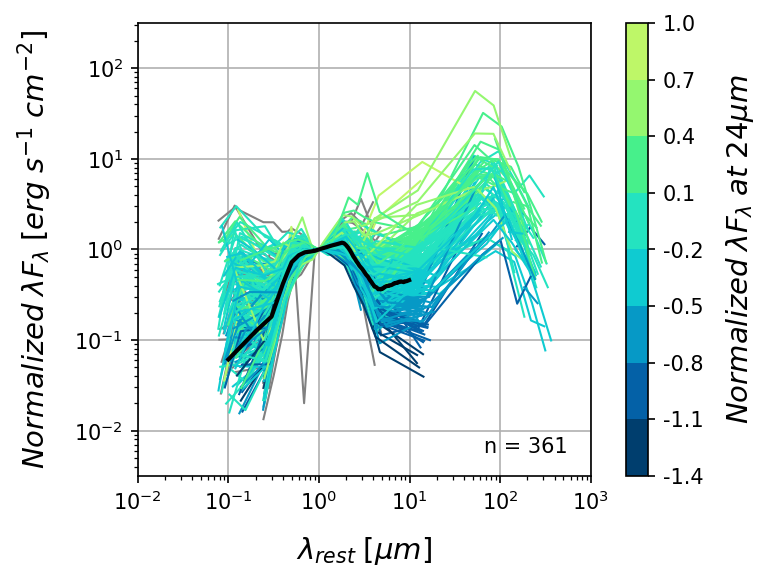

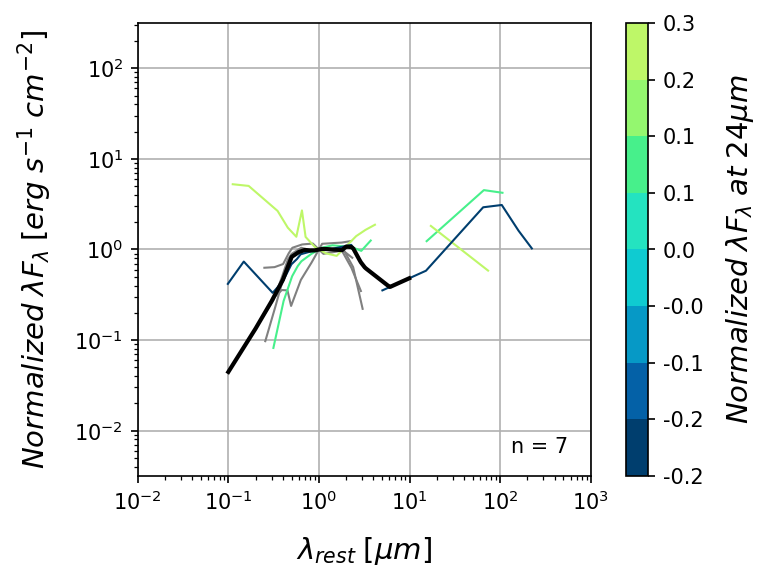

In [23]:
# plot SEDs for 0<z<1 for split blue
SED.PlotSED(agn_lamR_A_z01[BYI], agn_lamFlam_ergscm2_norm_z01[BYI], cmap='b', save=path_fig+'\COSMOS_SED_byi_0z1.png')#, title='Blue w/ IRAC: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[BNI], agn_lamFlam_ergscm2_norm_z01[BNI], cmap='b', save=path_fig+'\COSMOS_SED_bni_0z1.png')#, title='Blue w/o IRAC: 0<z$\leq$1')

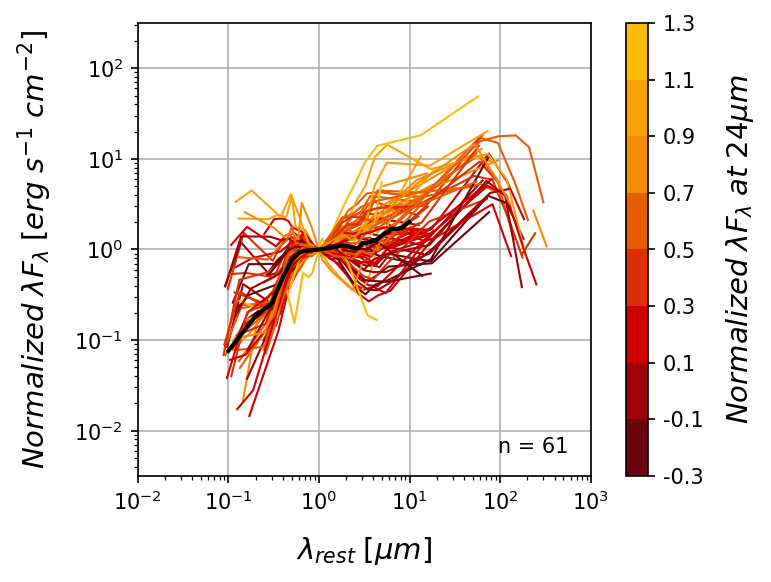

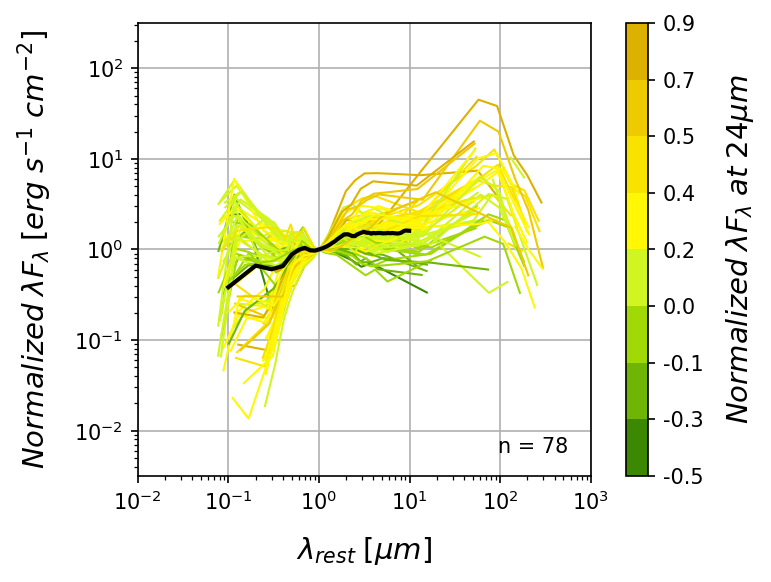

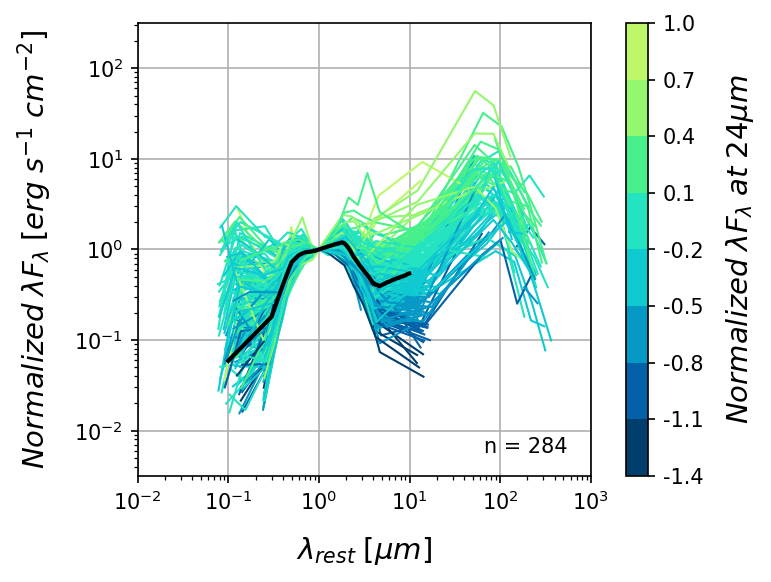

In [24]:
# plot SEDs for all color AGN with 24um detections 
SED.PlotSED(agn_lamR_A_z01[R24], agn_lamFlam_ergscm2_norm_z01[R24], cmap='r', save=path_fig+'\COSMOS_SED_r24_z01.png')#, title='Red w/24um: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[Y24], agn_lamFlam_ergscm2_norm_z01[Y24], cmap='y', save=path_fig+'\COSMOS_SED_y24_z01.png')#, title='Yellow w/24um: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[B24], agn_lamFlam_ergscm2_norm_z01[B24], cmap='b', save=path_fig+'\COSMOS_SED_b24_z01.png')#, title='Blue w/24um: 0<z$\leq$1')

In [25]:
# # get array for all sources
# all24_lamR_A = np.concatenate((agn_lamR_A[R24],agn_lamR_A[Y24],agn_lamR_A[B24]), axis=0)
# all24_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm[R24],agn_lamFlam_ergscm2_norm[Y24],agn_lamFlam_ergscm2_norm[B24]), axis=0)

# # verify
# SED.PrintShape(all24_lamR_A)
# SED.PrintShape(all24_lamFlam_ergscm2_norm)

# # plot SED for all sources
# SED.PlotSED(all24_lamR_A, all24_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all24.png')#, title='All sources w/24um')

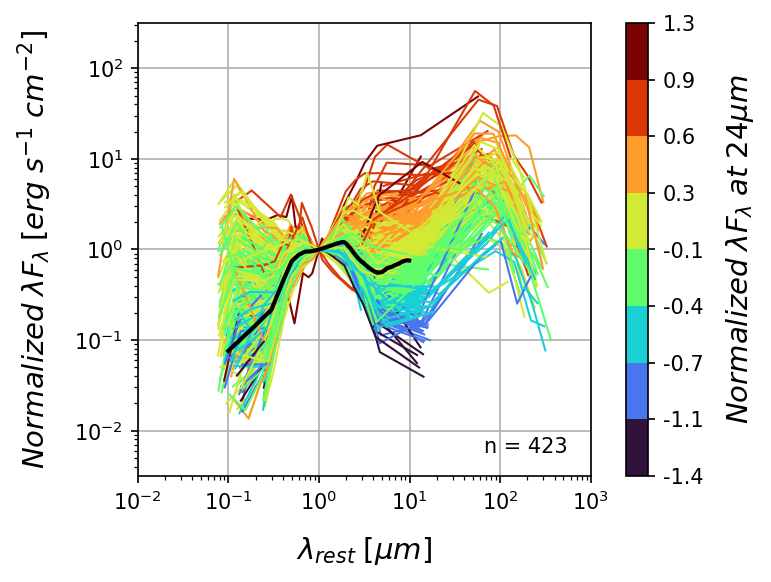

In [26]:
# get array for all z<1 sources 
z0125_lamR_A = np.concatenate((agn_lamR_A_z01[R24],agn_lamR_A_z01[Y24],agn_lamR_A_z01[B24]), axis=0)
z0125_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm_z01[R24],agn_lamFlam_ergscm2_norm_z01[Y24],agn_lamFlam_ergscm2_norm_z01[B24]), axis=0)

# plot SED for all sources
SED.PlotSED(z0125_lamR_A, z0125_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all24_z01.png')#, title='All sources w/24um')

# Investigate 10um

In [27]:
# offset = 13
# test = np.arange(0,10,1)
# test_off = [x+(offset*len(test)) for x in test]

# x = agn_lamR_A_z01[RED] [test_off]
# y = agn_lamFlam_ergscm2_norm_z01[RED] [test_off]

# SED.PlotSED(x,y,
#             title='Red: 0<z$\leq$1',
#             median=False,
#             xmin=1E-1,
#             ymin=1E-2
#             )

# Panel SED

In [28]:
# get red data
r_x = agn_lamR_A_z01[R24] * 1E-4
r_y = agn_lamFlam_ergscm2_norm_z01[R24]
r_cmap = SED.GetCmap('r')

# get yellow data
y_x = agn_lamR_A_z01[Y24] * 1E-4
y_y = agn_lamFlam_ergscm2_norm_z01[Y24]
y_cmap = SED.GetCmap('y')

# get blue data
b_x = agn_lamR_A_z01[B24] * 1E-4
b_y = agn_lamFlam_ergscm2_norm_z01[B24]
b_cmap = SED.GetCmap('b')

In [29]:
# interpolate

r_f_all = []
y_f_all = []
b_f_all = []

for x,y in zip(r_x,r_y) : 
    f = SED.Interpolate_log(x,y)
    r_f_all.append(f)

for x,y in zip(y_x,y_y) : 
    f = SED.Interpolate_log(x,y)
    y_f_all.append(f)

for x,y in zip(b_x,b_y) : 
    f = SED.Interpolate_log(x,y)
    b_f_all.append(f)

In [30]:
# get slope and boundary points 
r_uv_m   = SED.GetSlopes(r_f_all,0.15,1.00)
r_mir1_m = SED.GetSlopes(r_f_all,1.00,6.50)
r_mir2_m = SED.GetSlopes(r_f_all,6.50,10.0)

y_uv_m   = SED.GetSlopes(y_f_all,0.15,1.00)
y_mir1_m = SED.GetSlopes(y_f_all,1.00,6.50)
y_mir2_m = SED.GetSlopes(y_f_all,6.50,10.0)

b_uv_m   = SED.GetSlopes(b_f_all,0.15,1.00)
b_mir1_m = SED.GetSlopes(b_f_all,1.00,6.50)
b_mir2_m = SED.GetSlopes(b_f_all,6.50,10.0)

In [31]:
# get panels
r_panelMasks  = SED.SlopePanelMasks(r_uv_m, r_mir1_m, r_mir2_m)
r_xp, r_yp    = SED.PanelData(r_x,r_y,r_panelMasks)

y_panelMasks  = SED.SlopePanelMasks(y_uv_m, y_mir1_m, y_mir2_m)
y_xp, y_yp    = SED.PanelData(y_x,y_y,y_panelMasks)

b_panelMasks  = SED.SlopePanelMasks(b_uv_m, b_mir1_m, b_mir2_m)
b_xp, b_yp    = SED.PanelData(b_x,b_y,b_panelMasks)

In [35]:
# get values for colormap 
r_z = []
y_z = []
b_z = []

for panel in r_yp : 
    r_z.append(panel.T [14])

for panel in y_yp : 
    y_z.append(panel.T [14])

for panel in b_yp : 
    b_z.append(panel.T [14])

# normalize for colormap 
r_z_lognorm = SED.NormalizeForLogCmap_List(r_z)
y_z_lognorm = SED.NormalizeForLogCmap_List(y_z)
b_z_lognorm = SED.NormalizeForLogCmap_List(b_z)

# get colorbar range
r_cmap_max = np.log10(SED.MaxOfUneven2DList(r_z))
r_cmap_min = np.log10(SED.MinOfUneven2DList(r_z))
y_cmap_max = np.log10(SED.MaxOfUneven2DList(y_z))
y_cmap_min = np.log10(SED.MinOfUneven2DList(y_z))
b_cmap_max = np.log10(SED.MaxOfUneven2DList(b_z))
b_cmap_min = np.log10(SED.MinOfUneven2DList(b_z))

ValueError: max() arg is an empty sequence

In [ ]:
mosaic = [
        ["b1", "y1", "r1"],
        ["b2", "y2", "r2"],
        ["b3", "y3", "r3"],
        ["b4", "y4", "r4"],
        ["b5", "y5", "r5"]
    ]

fig = plt.figure(figsize=(6.5,10.5), constrained_layout=True)
ax_dict = fig.subplot_mosaic(
    mosaic, 
    sharex=True, 
    sharey=True
    )

# number of sources of a color 
r_n = np.shape(r_x)[0]
y_n = np.shape(y_x)[0]
b_n = np.shape(b_x)[0]

for i in range(5) : 
    # get percent
    r_p = round(np.shape(r_xp[i])[0]/r_n*100, 2)
    y_p = round(np.shape(y_xp[i])[0]/y_n*100, 2)
    b_p = round(np.shape(b_xp[i])[0]/b_n*100, 2)
    # plot
    SED.PlotSED_ax( ax_dict["r"+str(i+1)], r_xp[i], r_yp[i], z=r_z_lognorm[i], cmap=r_cmap, p=r_p)
    SED.PlotSED_ax( ax_dict["y"+str(i+1)], y_xp[i], y_yp[i], z=y_z_lognorm[i], cmap=y_cmap, p=y_p)
    SED.PlotSED_ax( ax_dict["b"+str(i+1)], b_xp[i], b_yp[i], z=b_z_lognorm[i], cmap=b_cmap, p=b_p)
    # panel label
    ax = ax_dict["r"+str(i+1)]
    ax.text(    1.15,                          # x
                0.50,                          # y 
                str(i+1),                      # string
                transform=ax.transAxes,        # use axis coordinants
                horizontalalignment='center',  # alignment 
                size=18
        )

# set font size for titles and axis labels
fs = 16

# add axis lables 
ax_dict["b3"].set_ylabel('$Normalized \; \lambda F_{\lambda} \; [erg \; s^{-1} \; cm^{-2}]$', fontsize=fs)
ax_dict["y5"].set_xlabel('$\lambda_{rest} \; [\mu m]$', fontsize=fs)

# add colorbars 
SED.PlotColorbar_ax(ax=ax_dict["r1"], cmap=r_cmap, min=r_cmap_min, max=r_cmap_max, n_ticks=3, size=fs, label='')
SED.PlotColorbar_ax(ax=ax_dict["y1"], cmap=y_cmap, min=y_cmap_min, max=y_cmap_max, n_ticks=3, size=fs, label='$Normalized \; \lambda F_{\lambda} \; at \; 24 \mu m$')
SED.PlotColorbar_ax(ax=ax_dict["b1"], cmap=b_cmap, min=b_cmap_min, max=b_cmap_max, n_ticks=3, size=fs, label='')

# finish plot 
myP.save(path_fig+'\COSMOS_SED_15panel_24um_z01.png')
plt.show()

# Scatterplots

In [ ]:
def GetInterp_MIR_UV(f_array) : 
    mir = []
    uv = []
    for f in f_array : 
        mir.append(SED.Flog_X(f, 6.00))
        uv.append( SED.Flog_X(f, 0.25))
    return mir,uv

In [ ]:
def PlotMIRvsUV(
    r_x_MIR, r_y_UV,
    y_x_MIR, y_y_UV,
    b_x_MIR, b_y_UV
):

    plt.scatter(r_x_MIR, r_y_UV, c=myP.c_ir,        marker='^' , alpha=0.5, s=20)
    plt.scatter(y_x_MIR, y_y_UV, c=myP.c_ir_xray,   marker='o' , alpha=0.5, s=20)
    plt.scatter(b_x_MIR, b_y_UV, c=myP.c_xray,      marker='s' , alpha=0.5, s=20)

    r_x_MIR_med = np.median(r_x_MIR)
    r_y_UV_med = np.median(r_y_UV)

    y_x_MIR_med = np.median(y_x_MIR)
    y_y_UV_med = np.median(y_y_UV)

    b_x_MIR_med = np.median(b_x_MIR)
    b_y_UV_med = np.median(b_y_UV)

    plt.scatter(r_x_MIR_med, r_y_UV_med, c=myP.c_ir,        marker='^' , edgecolor='k', s=50)
    plt.scatter(y_x_MIR_med, y_y_UV_med, c=myP.c_ir_xray,   marker='o' , edgecolor='k', s=50)
    plt.scatter(b_x_MIR_med, b_y_UV_med, c=myP.c_xray,      marker='s' , edgecolor='k', s=50)

    # scale
    plt.yscale('log')
    plt.xscale('log')

    # make plot square
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_adjustable('box') 

    plt.ylabel('$Normalized \; \lambda F_{\lambda}(0.25 \mu m)$') 
    plt.xlabel('$Normalized \; \lambda F_{\lambda}(6 \mu m)$')

    plt.show()

In [ ]:
r_x_MIR, r_y_UV = GetInterp_MIR_UV(r_f_all)
y_x_MIR, y_y_UV = GetInterp_MIR_UV(y_f_all)
b_x_MIR, b_y_UV = GetInterp_MIR_UV(b_f_all)

In [ ]:
PlotMIRvsUV(
    r_x_MIR, r_y_UV,
    y_x_MIR, y_y_UV,
    b_x_MIR, b_y_UV
)